In [14]:
file_path = "../experiment-3.csv"

/tmp/ipykernel_88978/395470688.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


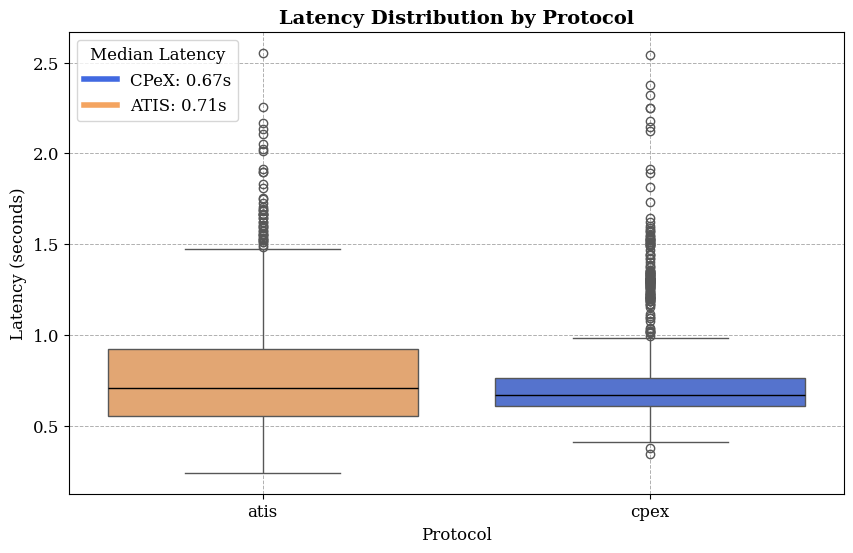

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

# Set global font settings to serif for academic formatting
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12  # Adjust to match academic text size

# Load the CSV file
df = pd.read_csv(file_path)

# Convert latency from milliseconds to seconds
df["latency"] = df["latency"] / 1000  # Convert ms to seconds

# Calculate median values
median_values = df.groupby("protocol")["latency"].median()

# Define lighter colors for better visibility
color_palette = {"cpex": "royalblue", "atis": "sandybrown"}  # Lighter blue and orange

# Create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="protocol", 
    y="latency", 
    data=df, 
    palette=color_palette, 
    medianprops={"color": "black"}  # Set median lines to black
)

# Customize grid lines to be dashed for better readability
plt.grid(True, linestyle="dashed", linewidth=0.7)

# Add median values to the legend
handles = [
    plt.Line2D([0], [0], color="royalblue", lw=4, label=f"CPeX: {median_values['cpex']:.2f}s"),
    plt.Line2D([0], [0], color="sandybrown", lw=4, label=f"ATIS: {median_values['atis']:.2f}s"),
]
plt.legend(handles=handles, title="Median Latency", loc="upper left")

# Labels and title
plt.title("Latency Distribution by Protocol", fontsize=14, fontweight='bold')
plt.xlabel("Protocol", fontsize=12)
plt.ylabel("Latency (seconds)", fontsize=12)

# Save as high-resolution PDF
pdf_path = "../charts/latency_boxplot_dashed.pdf"
plt.savefig(pdf_path, format="pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
